<a href="https://colab.research.google.com/github/akkiyolo/pytorch/blob/main/08_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### LOGISTIC REGRESSION
“Logistic regression is linear regression passed through a sigmoid to output a probability between 0 and 1. We use binary cross-entropy loss instead of MSE, but the training pipeline is identical. It’s the foundation of all classification and the final layer in most neural networks.”

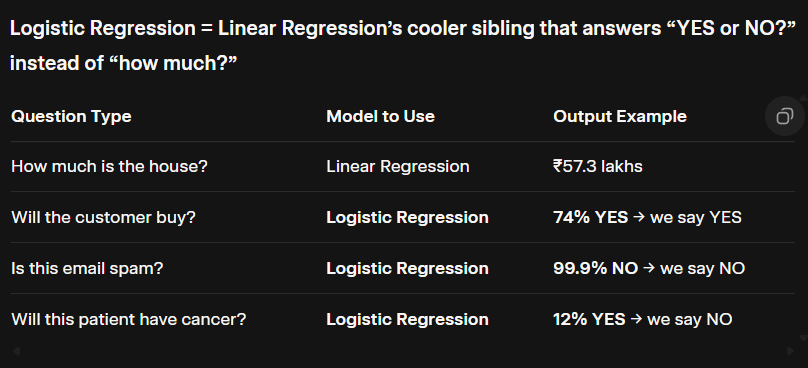

In [34]:
# 1) Design model(input,output size,forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass: compute prediction
# - backward pass: gradients
# - update weights

In [35]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
# 0) prepare data

bc=datasets.load_breast_cancer()
x,y=bc.data,bc.target

n_samples,n_ffeatures=x.shape

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1234)

In [37]:
# scale

sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

x_train=torch.from_numpy(x_train.astype(np.float32))
x_test=torch.from_numpy(x_test.astype(np.float32))

if isinstance(y_train, np.ndarray):
    y_train = torch.from_numpy(y_train.astype(np.float32))
else:
    y_train = y_train.float()

if isinstance(y_test, np.ndarray):
    y_test = torch.from_numpy(y_test.astype(np.float32))
else:
    y_test = y_test.float()

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [38]:
# 1) model
# f=wx+b , sigmoid at the end

class logisticRegression(nn.Module):

  def __init__(self,n_input_features):
    super(logisticRegression,self).__init__()
    self.linear=nn.Linear(n_input_features,1)

  def forward(self,x):
    y_predicted=torch.sigmoid(self.linear(x))
    return y_predicted

model=logisticRegression(n_ffeatures)

In [39]:
# 2) Loss and optimizer

learning_rate=0.01
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [40]:
# 3) training loop
num_epochs=100
for epoch in range(num_epochs):

  # forward pass and loss
  y_predicted=model(x_train)
  loss=criterion(y_predicted,y_train)

  # backward pass
  loss.backward()

  # updated weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f'epoch:{epoch+1},loss={loss.item():.4f}')

epoch:10,loss=0.5962
epoch:20,loss=0.4848
epoch:30,loss=0.4157
epoch:40,loss=0.3686
epoch:50,loss=0.3342
epoch:60,loss=0.3077
epoch:70,loss=0.2866
epoch:80,loss=0.2693
epoch:90,loss=0.2548
epoch:100,loss=0.2424


In [41]:
with torch.no_grad():
  y_predicted=model(x_test)
  y_predicted_cls=y_predicted.round()
  acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy={acc:.4f}')

accuracy=0.9035
